# 9.6 Lab: Support Vector Machines


In [45]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

In [46]:
# Support function to plot the decision boundary of svc and highlight the support vectors
def plot_decision_boundary(svc, X, y, h=0.021, pad=0.21):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # highlight the support vectors
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='*', s=21, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

## 9.6.1 Support Vector Classifier

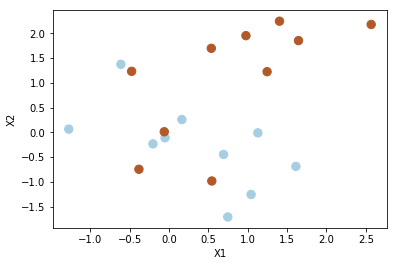

In [47]:
# we start from generating random dataset: following the bookm we generate a dataset with 20 observations,
# 2 features. And we divide thest into two classes.
# set seed 
np.random.seed(21)
X = np.random.randn(20, 2)
y = np.repeat([-1,1], 10)
X[y==1] = X[y==1] + 1

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

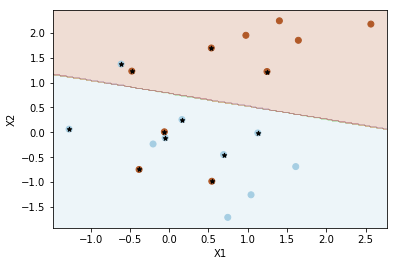

('Number of support vectors: ', 12)


In [48]:
# Support Vector Classifier (i.e. support vector machine with linear kernel)
svc1 = SVC(C= 10, kernel='linear')
svc1.fit(X, y)

plot_decision_boundary(svc1, X, y)

In [49]:
# as mentioned before, we could use dir() to see the methods of the class
dir(svc1)

# I did not find a good way to print out the summary of the SVC model.

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_impl',
 '_intercept_',
 '_pairwise',
 '_predict_log_proba',
 '_predict_proba',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_predict_proba',
 '_validate_for_predict',
 '_validate_targets',
 '_warn_from_fit_status',
 'cache_size',
 'class_weight',
 'class_weight_',
 'classes_',
 'co

In [50]:
# we could take a look at the defaul parameters of the SVC model
svc1.get_params()

{'C': 10,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

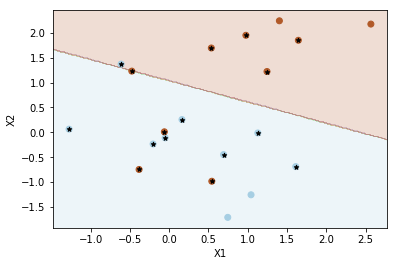

('Number of support vectors: ', 16)


In [51]:
# we use a small cost (c = 0.1). A smaller value of the cost parameter is being used, 
# we obtain a larger number of support vectors, because the margin is now wider. 
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)

plot_decision_boundary(svc2, X, y)


In [52]:
# we could also try to tune the cost parameter (C) of the SVC model using GridSearchCV
# in this function, we need to specify cross validation folds and the metric to use for evaluation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.00121014, 0.00093985, 0.00111792, 0.00143497, 0.00237615,
        0.0037822 , 0.01929097]),
 'mean_score_time': array([0.0006978 , 0.00149138, 0.00062656, 0.00052156, 0.00491297,
        0.00197368, 0.00185823]),
 'mean_test_score': array([0.75, 0.75, 0.75, 0.8 , 0.8 , 0.8 , 0.8 ]),
 'mean_train_score': array([0.8       , 0.8       , 0.79444444, 0.8       , 0.8       ,
        0.8       , 0.8       ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([5, 5, 5, 1, 1, 1, 1], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split0_train_score': array([0.83333333, 0.83333333, 0.77777778, 0.83333333, 0.83333333,
        0.83333333, 0.83333333]),
 'split1_test_score'

In [53]:
# let us see the best parameters. 
# This is different from the results in the book, it is very likely due to the random generation of the datasetof the data
clf.best_params_

{'C': 1}

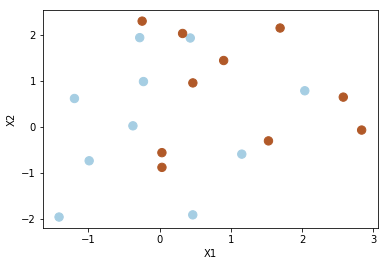

In [54]:
# we use the same generation process to generate test data
X_test = np.random.randn(20, 2)
y_test = np.repeat([-1,1], 10)
X_test[y_test==1] = X_test[y_test==1] + 1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [55]:
# train a model with the optimal parameters
svc3 = SVC(C=1, kernel='linear')
svc3.fit(X, y)

y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc3.classes_, columns=svc3.classes_)

,-1,1
-1,6,4
1,4,6


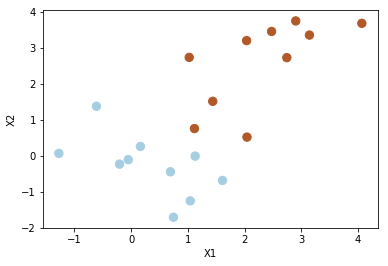

In [56]:
# now we make our data linear separable. In the book, they add another 0.5 to seperate the data. 
# here we start from the data generation process to aviod confusion.
np.random.seed(21)
X = np.random.randn(20, 2)
y = np.repeat([-1,1], 10)
X[y==1] = X[y==1] + 2.5

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

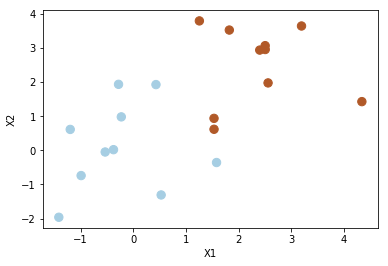

In [60]:
X_test = np.random.randn(20, 2)
y_test = np.repeat([-1,1], 10)
X_test[y_test==1] = X_test[y_test==1] + 2.5

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

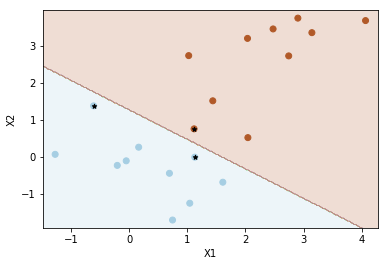

('Number of support vectors: ', 3)


In [57]:
# here seems the data is linear separable. We could use a bigger cost parameter (C = 100) to train the model.
svc4 = SVC(C=100, kernel='linear')
svc4.fit(X, y)

plot_decision_boundary(svc4, X, y)

In [61]:
y_pred = svc4.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc4.classes_, columns=svc4.classes_)

,-1,1
-1,8,2
1,0,10


## 9.6.2 Support Vector Machine

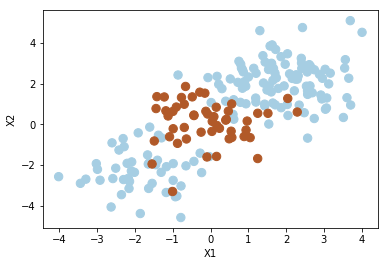

In [62]:
# Generating random dataset
np.random.seed(21)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [63]:
# in python, we can use the same svc model abd kernel to specific the kernel
# for rbf kernel, we need to specify the gamma parameter
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

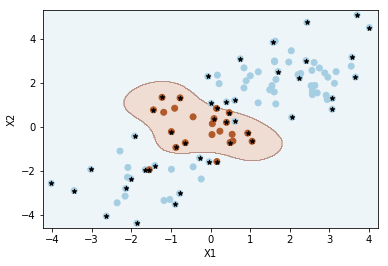

('Number of support vectors: ', 47)


In [65]:
plot_decision_boundary(svm, X_train, y_train)

In [66]:
y_pred = svm.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svm.classes_, columns=svm.classes_)

,-1,1
-1,70,3
1,12,15


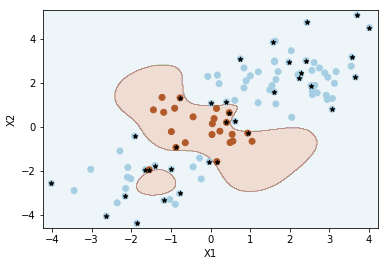

('Number of support vectors: ', 35)


In [68]:
# Increasing C parameter which increases more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_decision_boundary(svm2, X_train, y_train)

In [70]:
"""
The above decision boundary seems overfitting. we can compute the test accuracy of the model to
see whether that is the case. 

The model (c = 1) yields a test accuracy of 0.85; the model (c = 100) yields a test accuracy of 0.77.
"""
y_pred = svm2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svm2.classes_, columns=svm2.classes_)

,-1,1
-1,63,10
1,13,14
